In [1]:
import pandas as pd


In [4]:
# Load the dataset
file_path = "DA -Task 2..xlsx"

# Read the Excel file to inspect sheet names
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Sheet1']

In [10]:
df = pd.read_excel(xls, sheet_name="Sheet1")
df.shape

(100, 52)

In [8]:
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [18]:
# Column-wise analysis
def column_wise_analysis(df):
    analysis = []
    for col in df.columns:
        unique_values = df[col].nunique()
        missing_values = df[col].isnull().sum()
        dtype = df[col].dtype

        analysis.append({
            "Column": col,
            "Data Type": dtype,
            "Unique Values": unique_values,
            "Missing Values": missing_values,
            "Missing %": round((missing_values / len(df)) * 100, 2)
        })

    return pd.DataFrame(analysis)

column_analysis = column_wise_analysis(df)
column_analysis.sort_values(by="Missing %", ascending=False).head(10)  

,Column,Data Type,Unique Values,Missing Values,Missing %
31,CAMPAIGN_NBR,float64,0,100,100.0
40,ENGINE_TRACE_NBR,object,88,12,12.0
42,TRANSMISSION_TRACE_NBR,object,88,12,12.0
39,ENGINE_SOURCE_PLANT,object,9,12,12.0
41,TRANSMISSION_SOURCE_PLANT,float64,6,12,12.0
27,OPTN_FAMLY_CERTIFICATION,object,3,10,10.0
33,TOTALCOST,float64,94,6,6.0
28,OPTF_FAMLY_EMISSIOF_SYSTEM,object,8,5,5.0
5,CAUSAL_PART_NM,object,18,5,5.0
49,LAST_KNOWN_DELVRY_TYPE_CD,float64,11,2,2.0


In [20]:
# Data Cleaning Function
def data_cleaning(df):
    df = df.drop(columns=["CAMPAIGN_NBR"])

    # Fill missing values in categorical columns with 'Unknown'
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna("Unknown")

    # Fill missing values in numerical columns with median
    numerical_cols = df.select_dtypes(include=['number']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

    # Standardizing categorical text columns
    df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.upper().str.strip())

    return df

df_cleaned = data_cleaning(df)

# Verify that missing values are handled
df_cleaned.isnull().sum().sum()  # Should be 0 if all missing values are handled properly


239

In [36]:
# Identify columns still having missing values
missing_after_cleaning = df_cleaned.isnull().sum()
missing_after_cleaning[missing_after_cleaning > 0]


REPAIR_DLR_POSTAL_CD    86
ENGINE_SOURCE_PLANT     83
ENGINE_TRACE_NBR         5
LINE_SERIES             65
dtype: int64

In [38]:
# Final missing value handling
df_cleaned["REPAIR_DLR_POSTAL_CD"] = df_cleaned["REPAIR_DLR_POSTAL_CD"].fillna("UNKNOWN")
df_cleaned["ENGINE_SOURCE_PLANT"] = df_cleaned["ENGINE_SOURCE_PLANT"].fillna("UNKNOWN")
df_cleaned["LINE_SERIES"] = df_cleaned["LINE_SERIES"].fillna("UNKNOWN")
df_cleaned["ENGINE_TRACE_NBR"] = df_cleaned["ENGINE_TRACE_NBR"].fillna("UNKNOWN")

# Verify all missing values are handled
df_cleaned.isnull().sum().sum()  


0

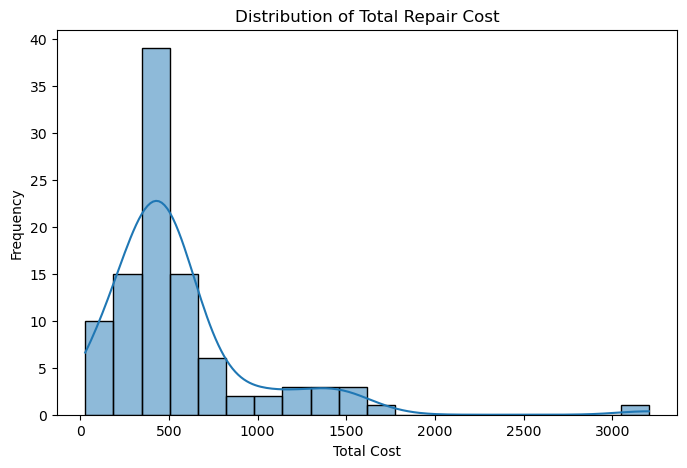

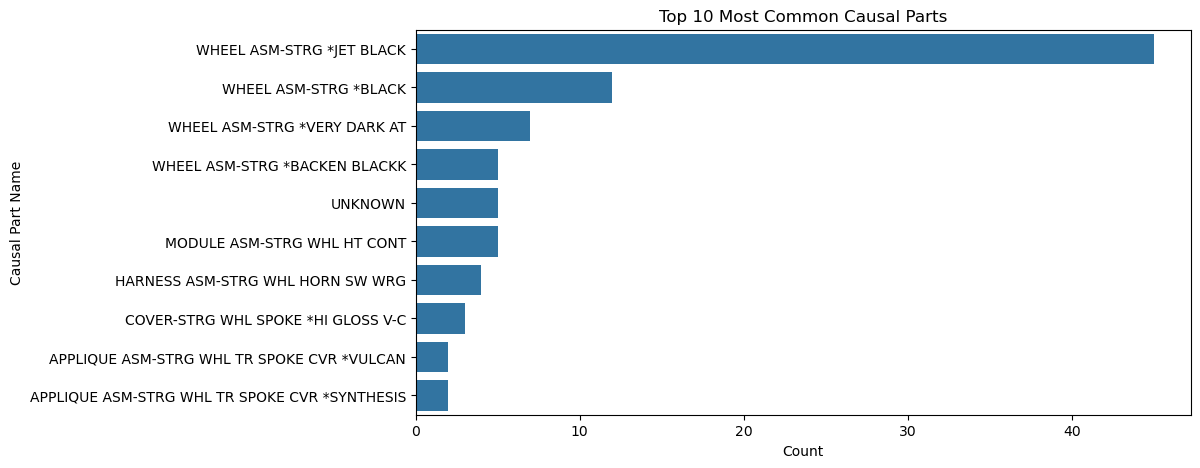

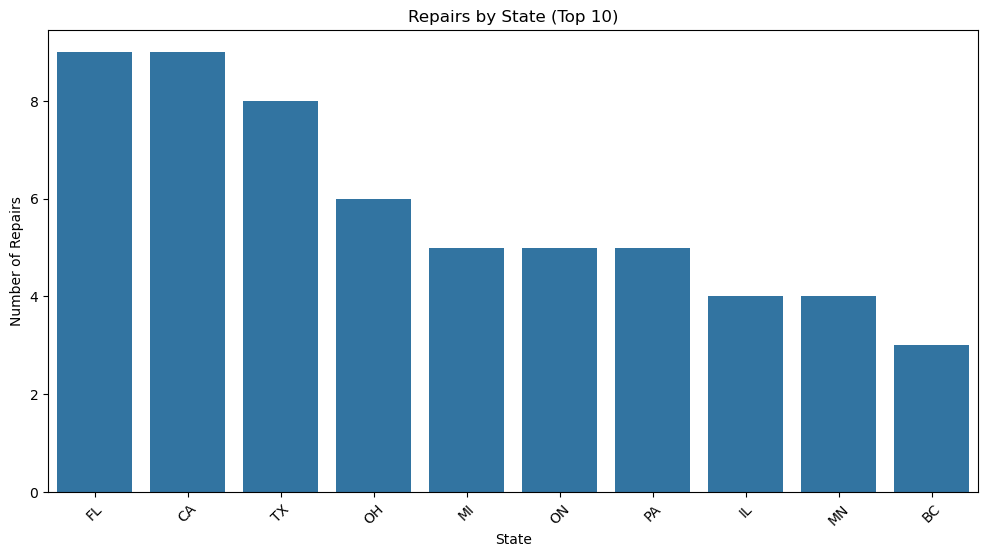

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identifying critical columns based on relevance
critical_columns = ["TOTALCOST", "CAUSAL_PART_NM", "PLATFORM", "STATE", "REPAIR_DATE"]

# Distribution of Total Cost
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["TOTALCOST"], bins=20, kde=True)
plt.title("Distribution of Total Repair Cost")
plt.xlabel("Total Cost")
plt.ylabel("Frequency")
plt.show()

# Most Common Causal Parts
plt.figure(figsize=(10, 5))
sns.countplot(y=df_cleaned["CAUSAL_PART_NM"], order=df_cleaned["CAUSAL_PART_NM"].value_counts().index[:10])
plt.title("Top 10 Most Common Causal Parts")
plt.xlabel("Count")
plt.ylabel("Causal Part Name")
plt.show()

# Repairs by State
plt.figure(figsize=(12, 6))
sns.countplot(x=df_cleaned["STATE"], order=df_cleaned["STATE"].value_counts().index[:10])
plt.title("Repairs by State (Top 10)")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Number of Repairs")
plt.show()

In [48]:
from collections import Counter
import re

# Function to extract meaningful tags from free text columns
def extract_tags(text_series, top_n=10):
    all_words = " ".join(text_series.dropna()).upper()
    words = re.findall(r"\b[A-Z]{3,}\b", all_words) 
    common_words = Counter(words).most_common(top_n)
    return common_words

# Extract tags from CUSTOMER_VERBATIM and CORRECTION_VERBATIM
customer_tags = extract_tags(df_cleaned["CUSTOMER_VERBATIM"])
correction_tags = extract_tags(df_cleaned["CORRECTION_VERBATIM"])

customer_tags,correction_tags

([('STEERING', 100),
  ('WHEEL', 100),
  ('STATES', 58),
  ('CUSTOMER', 56),
  ('THE', 55),
  ('AND', 36),
  ('COMING', 25),
  ('NOT', 21),
  ('HEATED', 19),
  ('SOP', 18)],
 [('WHEEL', 127),
  ('STEERING', 124),
  ('AND', 80),
  ('REPLACED', 51),
  ('THE', 26),
  ('FOUND', 25),
  ('REPLACE', 25),
  ('REMOVED', 17),
  ('MODULE', 16),
  ('HEATED', 15)])

In [54]:
df_cleaned.to_csv('cleaned_data.csv', index=False)